<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/prio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.0 MB/s eta 0:00:00


In [2]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=752ce9d0fe9ee63e7794a8182ae62327d9f96666ab256b75bd1b0b23ff0d5329
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [3]:
import yfinance as yf
import pandas as pd
import pandas_datareader.data as pdr
#yf.pdr_override()

import datetime as dt
import pandas_ta as ta # análise técnica das bandas de bollinger


# Gráficos
import mplfinance as mpf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# Carregando as cotações
Cotacoes = yf.Ticker("PRIO3.SA")

# Opções de períodos 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y e ytd.
dados = Cotacoes.history(period="1mo")
dados.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-07 00:00:00-03:00,44.90,45.55,44.77,45.53,8799000,0.00,0.00
2024-10-08 00:00:00-03:00,44.25,44.57,44.05,44.11,10127500,0.00,0.00
2024-10-09 00:00:00-03:00,44.21,44.32,43.55,43.70,7041100,0.00,0.00
2024-10-10 00:00:00-03:00,44.10,45.07,44.00,44.88,8241100,0.00,0.00
2024-10-11 00:00:00-03:00,44.51,44.75,44.10,44.26,6111800,0.00,0.00


In [6]:
dados.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-10-30 00:00:00-03:00,40.99,41.56,40.90,41.21,7537500,0.00,0.00
2024-10-31 00:00:00-03:00,41.21,41.44,40.64,40.98,6136200,0.00,0.00
2024-11-01 00:00:00-03:00,41.36,41.46,39.65,39.85,11400100,0.00,0.00
2024-11-04 00:00:00-03:00,40.35,41.34,40.33,40.88,8831200,0.00,0.00
2024-11-05 00:00:00-03:00,40.90,41.07,39.96,40.33,6951400,0.00,0.00


In [7]:
# Preview do resultado das BB
dados.ta.bbands(length=5, std=2.0).head(10)

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,
2024-10-07 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-10-08 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-10-09 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-10-10 00:00:00-03:00,NaN,NaN,NaN,NaN,NaN
2024-10-11 00:00:00-03:00,43.21,44.50,45.78,5.76,0.41
2024-10-14 00:00:00-03:00,43.08,44.08,45.07,4.52,0.18
2024-10-15 00:00:00-03:00,42.74,43.91,45.08,5.33,0.24
2024-10-16 00:00:00-03:00,42.23,43.73,45.22,6.85,0.18
2024-10-17 00:00:00-03:00,42.17,43.29,44.42,5.19,0.24


In [8]:
# Parâmetros
leng = 5
desv = 2.0

# Definindo dataframe com as BB
df2 = dados.ta.bbands(length=leng, std= desv)

<Axes: xlabel='Date'>

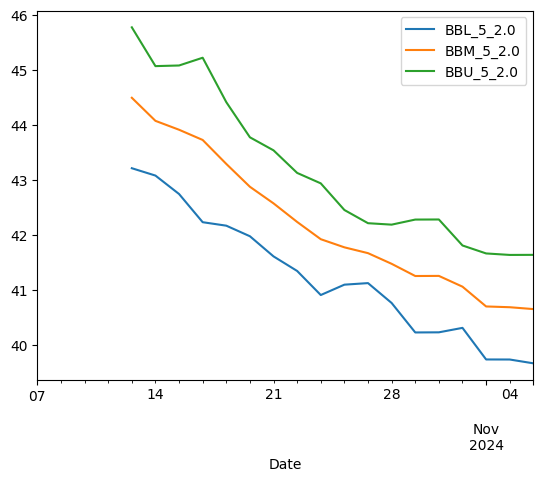

In [9]:
# Plot de diagnóstico
df2.iloc[:,:3].plot()

<Axes: xlabel='Date'>

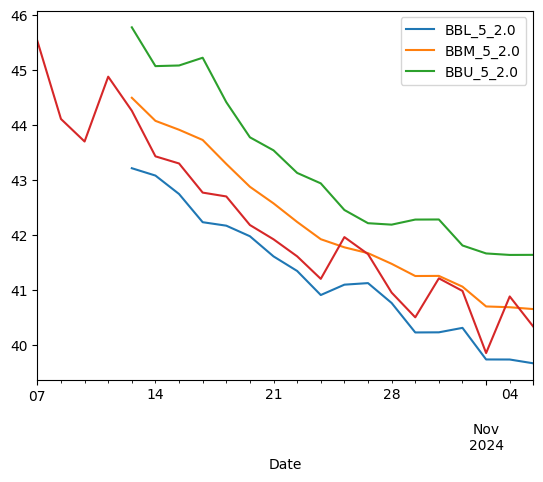

In [10]:
# Plot de preço de fechamento e as bandas de bollinger
(df2).iloc[:,:3].plot()
dados['Close'].plot()

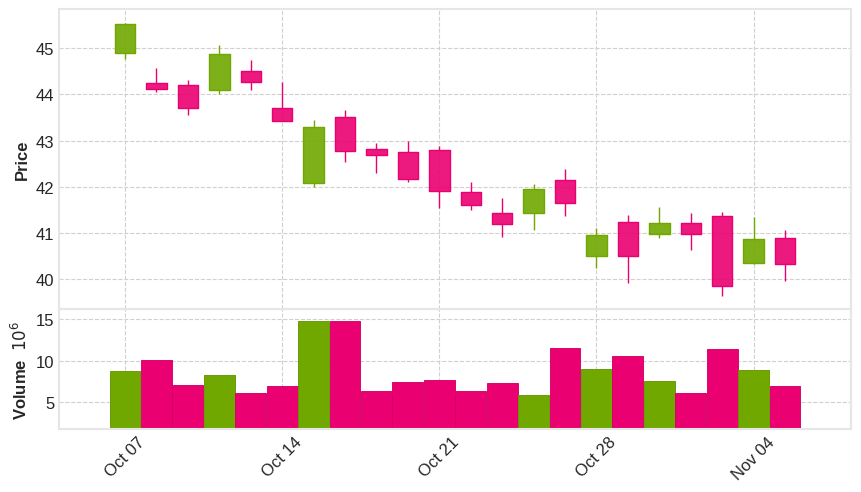

In [11]:
# Estilo Binance

mpf.plot(dados, type = 'candle', figsize = (11,6), volume = True,style='binance')

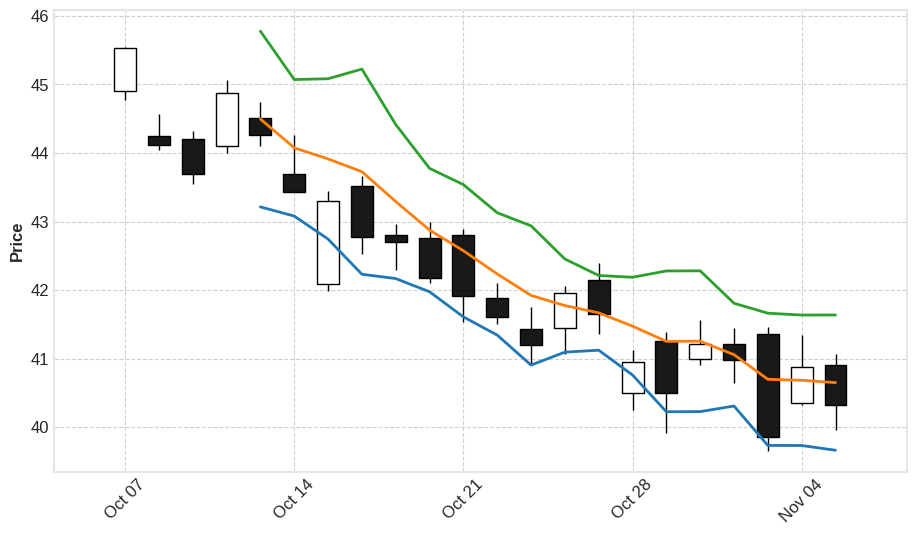

In [12]:
# Adicionando as bandas de bollinger com as velas de preço -  segunda tentativa

fig, ax = plt.subplots(figsize = (11,6))
mpf.plot(dados, type = 'candle', ax= ax)
df2['aux'] = range(0,dados.shape[0])
plt.plot(df2['aux'], df2.iloc[:,:3]);

In [13]:
# Adicionando figura com as velas de preço
fig1 = go.Figure(data=[go.Candlestick(x=dados.index,
                open=dados['Open'],
                high=dados['High'],
                low=dados['Low'],
                close=dados['Close'],
                name="plot")])

# Figura com as bandas de bollinger
fig2 = px.line(df2, x=df2.index, y=[f"BBL_{leng}_{desv}",f"BBU_{leng}_{desv}" ,f"BBM_{leng}_{desv}"])

# Unindo as duas figuras
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.update_layout(xaxis_rangeslider_visible=False)

# adicionando elementos de layout
fig3.update_layout(
    title = dict(text="Cotação ITUB3", font=dict(size=40), yref='paper'),
    xaxis_title= dict(text="<b> Data </b>", font=dict(size=30)),
    yaxis_title= dict(text="<b>Preço (R$) </b>", font=dict(size=30)),
    font_family="Courier New",
    font_color="black",
    title_font_family="Arial",
    title_font_color="red",
    legend_title_font_color="green",

    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=15,
            color='black',
        ),
    ),
    yaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=15,
            color='black',
        ),
    )
)

# Mostrando plot Final
fig3.show()

# Plot de volume
fig4 = px.bar(dados, x=dados.index, y='Volume')
fig4.show()